In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_test = pd.read_csv('../data/pzn-rent-test.csv')
data_train = pd.read_csv('../data/pzn-rent-train.csv')
data_merged = pd.concat([data_train, data_test])
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16139 entries, 0 to 4841
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  16139 non-null  int64  
 1   ad_title            16139 non-null  object 
 2   date_activ          16139 non-null  object 
 3   date_modif          16139 non-null  object 
 4   date_expire         16139 non-null  object 
 5   individual          14545 non-null  object 
 6   price               11297 non-null  float64
 7   flat_area           14415 non-null  float64
 8   flat_rooms          14397 non-null  float64
 9   flat_furnished      14208 non-null  object 
 10  flat_rent           16139 non-null  int64  
 11  flat_deposit        16139 non-null  float64
 12  flat_for_students   13594 non-null  object 
 13  building_floor_num  16139 non-null  int64  
 14  flat_balcony        14209 non-null  object 
 15  flat_utility_room   16139 non-null  bool   
 16  flat_garag

In [10]:
data_dropped = data_merged.dropna()
data_dropped.count()
data_merged.count()
data_merged.dtypes

id                      int64
ad_title               object
date_activ             object
date_modif             object
date_expire            object
individual             object
price                 float64
flat_area             float64
flat_rooms            float64
flat_furnished         object
flat_rent               int64
flat_deposit          float64
flat_for_students      object
building_floor_num      int64
flat_balcony           object
flat_utility_room        bool
flat_garage            object
flat_basement            bool
flat_garden            object
flat_tarrace             bool
flat_lift                bool
flat_two_level           bool
flat_kitchen_sep         bool
flat_air_cond            bool
flat_nonsmokers          bool
flat_washmachine         bool
flat_dishwasher        object
flat_fridge              bool
flat_cooker              bool
flat_oven                bool
flat_internet          object
flat_television          bool
flat_anti_blinds         bool
flat_monit

In [11]:
data_train.columns
set(data_test.columns) - set(data_train.columns)
set(data_train.columns) - set(data_test.columns)

{'price'}

In [12]:
data_train.dtypes

id                      int64
ad_title               object
date_activ             object
date_modif             object
date_expire            object
individual             object
price                   int64
flat_area             float64
flat_rooms            float64
flat_furnished         object
flat_rent               int64
flat_deposit          float64
flat_for_students      object
building_floor_num      int64
flat_balcony           object
flat_utility_room        bool
flat_garage            object
flat_basement            bool
flat_garden            object
flat_tarrace             bool
flat_lift                bool
flat_two_level           bool
flat_kitchen_sep         bool
flat_air_cond            bool
flat_nonsmokers          bool
flat_washmachine         bool
flat_dishwasher        object
flat_fridge              bool
flat_cooker              bool
flat_oven                bool
flat_internet          object
flat_television          bool
flat_anti_blinds         bool
flat_monit

In [13]:
train_dropped = data_train.dropna()
X_dropped = train_dropped.drop(['price', 'ad_title','date_activ','date_modif','date_expire','quarter'], axis=1)
Y_dropped = train_dropped['price']
X_dropped

,id,individual,flat_area,flat_rooms,flat_furnished,flat_rent,flat_deposit,flat_for_students,building_floor_num,flat_balcony,...,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_internet,flat_television,flat_anti_blinds,flat_monitoring,flat_closed_area
0,2508,False,49.0,2.0,False,0,0.0,False,4,True,...,False,False,False,False,False,False,False,False,False,False
3,8889,False,10.0,1.0,False,0,0.0,False,5,True,...,False,False,False,False,False,True,False,False,True,False
4,12721,False,47.0,2.0,False,0,0.0,False,2,True,...,False,False,False,False,False,False,False,False,False,True
7,9513,True,60.0,3.0,True,598,2400.0,True,4,True,...,True,True,True,True,True,True,False,False,True,True
8,3432,False,55.0,2.0,True,0,1900.0,False,6,True,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,5215,False,65.7,3.0,False,0,3400.0,False,5,True,...,False,False,False,False,False,False,False,False,False,False
11288,1899,False,51.0,2.0,True,500,0.0,True,4,True,...,False,False,True,True,True,True,True,False,False,False
11289,2335,False,53.3,1.0,False,90,0.0,False,4,False,...,False,False,False,False,False,False,False,False,False,False
11290,6291,False,41.0,1.0,False,0,0.0,False,0,False,...,False,False,False,False,False,False,False,False,False,False


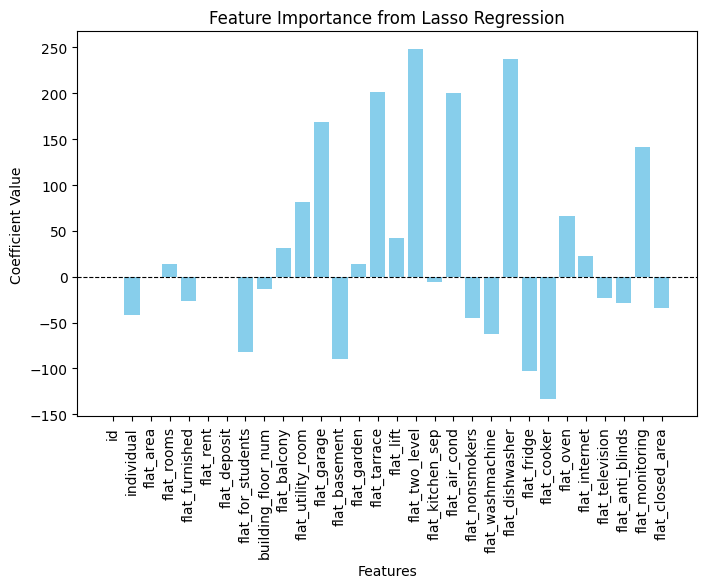

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_dropped, Y_dropped)

# Get coefficients
coefficients = lasso.coef_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(X_dropped.columns, coefficients, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Lasso Regression')
plt.xticks(rotation=90)
plt.show()


In [15]:
X_dropped_2 = train_dropped.drop(['price', 'ad_title','date_activ','date_modif','date_expire'], axis=1)

encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the quarter column
encoded_quarter = encoder.fit_transform(X_dropped_2[['quarter']])

# Create DataFrame with encoded columns
encoded_quarter_df = pd.DataFrame(
    encoded_quarter.toarray(),  # Convert to dense array
    columns=encoder.get_feature_names_out(['quarter'])
)

# Concatenate the original DataFrame (after dropping 'quarter') with the encoded 'quarter' columns
df_encoded = pd.concat([X_dropped_2.drop('quarter', axis=1), encoded_quarter_df], axis=1)
df_encoded

,id,individual,flat_area,flat_rooms,flat_furnished,flat_rent,flat_deposit,flat_for_students,building_floor_num,flat_balcony,...,quarter_Winiary,quarter_Winogrady,quarter_Wola,quarter_Zawady,quarter_Zieliniec,quarter_Ławica,quarter_Łazarz,quarter_Śródka,quarter_Świerczewo,quarter_Żegrze
0,2508.0,False,49.0,2.0,False,0.0,0.0,False,4.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8889.0,False,10.0,1.0,False,0.0,0.0,False,5.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12721.0,False,47.0,2.0,False,0.0,0.0,False,2.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9513.0,True,60.0,3.0,True,598.0,2400.0,True,4.0,True,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3432.0,False,55.0,2.0,True,0.0,1900.0,False,6.0,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Use get_dummies with more careful handling
df_encoded = pd.get_dummies(X_dropped_2, columns=['quarter'], prefix='quarter')

# Verify rows and columns
print("Original DataFrame rows:", len(X_dropped_2))
print("Encoded DataFrame rows:", len(df_encoded))

#X_dropped_2 = df_encoded.drop(['price'],axis =1)

Original DataFrame rows: 4543
Encoded DataFrame rows: 4543


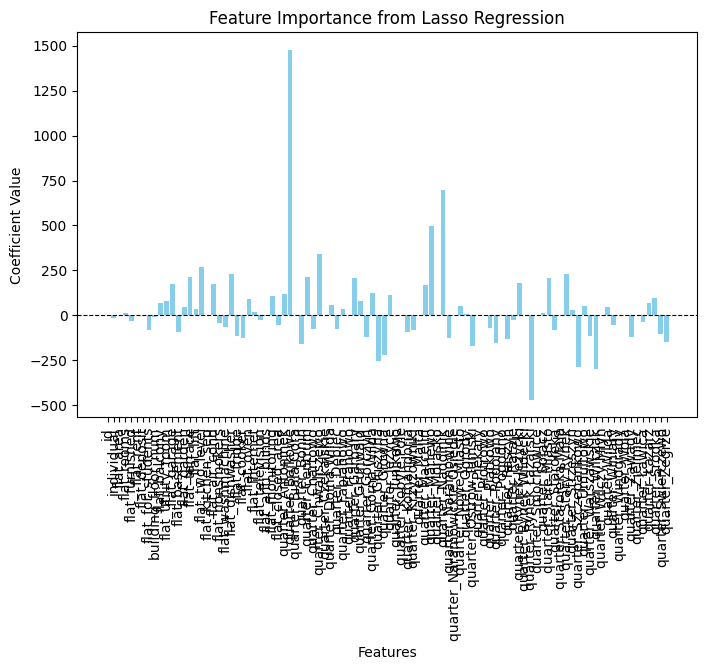

In [17]:
lasso = Lasso(alpha=0.1)
lasso.fit(df_encoded, Y_dropped)

# Get coefficients
coefficients = lasso.coef_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(df_encoded.columns, coefficients, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Lasso Regression')
plt.xticks(rotation=90)
plt.show()

In [18]:
sorted_features = np.abs(lasso.coef_).argsort()  # Indices of features ordered by importance

linear_reg = LinearRegression()
mse_values = []

# Iterate through the sorted features
for i in range(1, len(sorted_features) + 1):
    # Select the first 'i' most important features
    selected_features = X_dropped.iloc[:, sorted_features[:i]]
    
    # Fit Linear Regression model on the selected features
    linear_reg.fit(selected_features, Y_dropped)
    
    # Predict on the test set using the selected features
    y_pred = linear_reg.predict(X_dropped[selected_features.columns])
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(Y_dropped, y_pred)
    
    # Append the MSE to the list
    mse_values.append(mse)

# Plot the MSE values vs the number of features
plt.plot(range(1, len(sorted_features) + 1), mse_values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Features for Linear Regression')
plt.grid(True)
plt.show()

IndexError: positional indexers are out-of-bounds

In [35]:
linear_reg = LinearRegression()
X_test = data_test.drop(['ad_title','date_activ','date_expire','date_modif','quarter'], axis=1)
X_test = X_test.fillna(X_test.median())

linear_reg.fit(X_dropped, Y_dropped)
y_pred = linear_reg.predict(X_test)
y_pred


array([1656.39897269, 1682.272915  , 1543.62632038, ..., 1554.77040657,
       1552.25506839, 1441.59590642])

In [39]:
result = pd.DataFrame(columns=['TARGET'], data=y_pred)
result.to_csv('results_1.csv')

In [12]:
data_test

,id,ad_title,date_activ,date_modif,date_expire,individual,flat_area,flat_rooms,flat_furnished,flat_rent,...,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_internet,flat_television,flat_anti_blinds,flat_monitoring,flat_closed_area,quarter
0,4,wynajmę mieszkanie poznan,2014-08-10,2020-03-03,2020-03-10,True,49.0,2.0,True,0,...,False,True,True,True,False,False,False,False,False,Górna Wilda
1,5,Kawalerka Poznań Rataje niska zabudowa 2 piętro,2014-08-17,2019-11-15,2019-12-15,True,NaN,NaN,True,350,...,False,True,True,True,False,False,False,True,False,NaN
2,9,"Kawalerka, w szeregowcu z osobnym wejściem",2014-09-23,2019-11-13,2019-12-12,True,NaN,NaN,True,300,...,False,True,True,False,NaN,True,True,False,NaN,NaN
3,20,Wynajmę mieszkanie 4 pokojowe Winogrady,2015-01-29,2019-06-03,2019-07-01,True,-999.0,4.0,True,700,...,True,True,True,True,NaN,False,False,False,False,Winogrady
4,23,Apartament z tarasem na dachu,2015-03-04,2019-11-07,2019-11-27,True,76.0,3.0,True,800,...,True,True,True,True,True,True,False,False,NaN,Rataje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,16419,"3 pokoje, Jagiełły, Piątkowo bezpośrednio",2020-09-25,2020-09-25,2020-10-25,True,50.0,3.0,True,500,...,False,True,True,True,False,False,False,False,False,Piątkowo
4838,16422,"Mieszkanie, 75 m², Poznań",2020-09-25,2020-09-25,2020-10-25,False,-999.0,3.0,False,750,...,False,False,False,False,True,True,False,True,False,Stare Miasto
4839,16425,"Dwa pokoje z balkonem, Poznań, Bez prowizji",2020-09-25,2020-09-25,2020-10-25,False,-999.0,2.0,False,181,...,True,True,True,True,False,False,False,False,False,Wilda
4840,16429,Mieszkanie w kamienicy na Jeżycach/ Apt for rent,2020-09-25,2020-09-25,2020-10-25,True,100.0,3.0,True,455,...,False,True,True,True,True,True,False,False,False,Jeżyce


In [8]:
linear_reg = LinearRegression()

X_test = data_test.drop(['ad_title','date_activ','date_expire','date_modif'], axis=1)
#X_test = X_test.fillna(X_test.median())
X_test= pd.get_dummies(X_test, columns=['quarter'], prefix='quarter')
X_test = X_test.fillna(X_test.median())
X_test

linear_reg.fit(df_encoded, Y_dropped)
y_pred = linear_reg.predict(X_test)

result = pd.DataFrame(columns=['TARGET'], data=y_pred)
result.to_csv('results_2.csv')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- quarter_Edwardowo
- quarter_Kopanina
- quarter_Krzesiny
- quarter_Radojewo
- quarter_Spławie
- ...
Feature names seen at fit time, yet now missing:
- quarter_Biała Góra
- quarter_Głuszyna
- quarter_Marlewo
- quarter_Piekary
- quarter_Pogodno


In [9]:
linear_reg = LinearRegression()

# Drop unnecessary columns from test data
X_test = data_test.drop(['ad_title','date_activ','date_expire','date_modif'], axis=1)

# Apply one-hot encoding to 'quarter' columns
X_test = pd.get_dummies(X_test, columns=['quarter'], prefix='quarter')

# Impute missing values using the median (for all columns)
X_test = X_test.fillna(X_test.median())

# Align columns between training and test data (ensure test data has the same columns as training data)
# If X_test is missing columns, add them with NaN or a default value like 0
missing_cols = set(df_encoded.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # You can choose another imputation strategy here

# Reorder columns to match the training data (df_encoded)
X_test = X_test[df_encoded.columns]

# Fit the model on the training data
linear_reg.fit(df_encoded, Y_dropped)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

# Create a result dataframe
result = pd.DataFrame(columns=['TARGET'], data=y_pred)

# Save the results to a CSV file
result.to_csv('results_2.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_15468\3078700157.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0  # You can choose another imputation strategy here
C:\Users\user\AppData\Local\Temp\ipykernel_15468\3078700157.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0  # You can choose another imputation strategy here
C:\Users\user\AppData\Local\Temp\ipykernel_15468\3078700157.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m